# Проект 4

**Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на вопросы.**

<div class="alert alert-block alert-danger"
<b>
<ol>
    
**Задача 1**

Сколько пользователей, которые совершили покупку только один раз?

</ol>
</b>
</div>

<div class="alert alert-block alert-info"
<b>
Для начала подключим необходимые библиотеки
</b>
</div

In [32]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import requests 
from urllib.parse import urlencode
from datetime import timedelta

<div class="alert alert-block alert-info"
<b>
Данные предоставили в виде файла, загруженного на Яндекс Диск. Подгрузим их.
</b>
</div

In [2]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key_customers = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'  
public_key_orders = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'
public_key_items = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'
    
    
# получаем url 
final_url_customers = base_url + urlencode(dict(public_key=public_key_customers)) 
final_url_orders = base_url + urlencode(dict(public_key=public_key_orders)) 
final_url_items = base_url + urlencode(dict(public_key=public_key_items)) 

response_customers = requests.get(final_url_customers) 
response_orders = requests.get(final_url_orders) 
response_items = requests.get(final_url_items)

download_url_customers = response_customers.json()['href'] 
download_url_orders = response_orders.json()['href'] 
download_url_items = response_items.json()['href'] 
        
# загружаем файлы  
download_response_customers = requests.get(download_url_customers) 
download_response_orders = requests.get(download_url_orders) 
download_response_items = requests.get(download_url_items) 

customers = pd.read_csv(download_url_customers) 
orders = pd.read_csv(download_url_orders,parse_dates=['order_delivered_carrier_date','order_delivered_customer_date',\
    'order_estimated_delivery_date','order_purchase_timestamp','order_approved_at']) 
items = pd.read_csv(download_url_items,parse_dates=['shipping_limit_date']) 

<div class="alert alert-block alert-info"
<b>
Далее проведем предварительную проверку данных:

* посмотрим на датафреймы

</b>
</div

In [3]:
customers.head() 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [5]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<div class="alert alert-block alert-info"
<b>

* проверим типы данных

</b>
</div

In [6]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [7]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [8]:
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

<div class="alert alert-block alert-info"
<b>

* размер фреймов

</b>
</div

In [9]:
customers.shape

(99441, 5)

In [10]:
orders.shape

(99441, 8)

In [11]:
items.shape

(112650, 7)

<div class="alert alert-block alert-info"
<b>

* наличие пропущенных значений 

</b>
</div

In [12]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

<div class="alert alert-block alert-info"
<b>

* сколько уникальных значений встречаются

</b>
</div

In [15]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [16]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [17]:
items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

<div class="alert alert-block alert-info"
<b>

* посмотрим на распредление заказов в зависимости от статуса

</b>
</div

In [18]:
orders.groupby("order_status", as_index = False).agg({"customer_id": "count"})

,order_status,customer_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


<div class="alert alert-block alert-info"
<b>

* посмотрим, в каких временных рамках подтверждалась оплата заказа

</b>
</div

In [19]:
orders.order_approved_at.min()

Timestamp('2016-09-15 12:16:38')

In [20]:
orders.order_approved_at.max()

Timestamp('2018-09-03 17:40:06')

<div class="alert alert-block alert-info"
<b>

* посмотрим, сколько товаров в каждом заказе

</b>
</div

In [21]:
items.groupby("order_id", as_index = False).agg({"order_item_id": "count"}).sort_values("order_item_id", ascending=False)

,order_id,order_item_id
50137,8272b63d03f5f79c56e9e4120aec44ef,21
10459,1b15974a0141d54e36626dca3fdc731a,20
65715,ab14fdcfbe524636d65ee38360e22ce8,20
60941,9ef13efd6949e4573a18964dd1bbe7f5,15
25583,428a2f660dc84138d969ccd69a0ab6d5,15
...,...,...
34640,5a0911d70c1f85d3bed0df1bf693a6dd,1
34639,5a082b558a3798d3e36d93bfa8ca1eae,1
34637,5a07264682e0b8fbb3f166edbbffc6e8,1
34636,5a071192a28951b76774e5a760c8c9b7,1


<div class="alert alert-block alert-info"
<b>

Приступим к решению задачи 1.

В качестве покупки будем рассматривать статусы: 

* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю

Заказы с таким статусом оплачены и не отменены, а значит произошел факт покупки

Почему другие статусы нам не подходят?
* created(создан) не будет рассматриваться в качестве покупки, так как заказ создан, но еще не подтвержден и не оплачен, 
а это значит факта покупки нет, заказ могут отменить на стадии оформления, это просто заявка 
* approved(подтверждён) - здесь заказ уже подтвердили, то есть продавец подтвердил, что заказ он получил, но так же 
факта оплаты нет, а это не покупка 
* invoiced(выставлен счёт) - уже лучше, продавец выставил счет, но он еще не оплачен
* unavailable(недоступен) и canceled(отменён) - в принципе говорят о неудачной сделке, а не о покупке 

</b>
</div

<div class="alert alert-block alert-info"
<b>

Для начала объединим две таблицы с информацией о пользователях и заказах. Сделаем это методом merge.

</b>
</div


In [22]:
merge_cust_ord = customers.merge(orders)

<div class="alert alert-block alert-info"
<b>

Найдем число пользователей, которые сделали покупку только 1 раз:

</b>
</div

In [23]:
merge_cust_ord.query('order_status == ["processing", "shipped", "delivered"]')\
            .groupby('customer_unique_id', as_index=False)\
            .agg({'order_id': 'count'})\
            .query('order_id == 1').order_id.sum()

91814

<div class="alert alert-block alert-danger"
<b>
<ol>
    
**Задача 2**

Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

</ol>
</b>
</div> 

<div class="alert alert-block alert-info"
<b>

Итак, вопрос касается только заказов, работать следует с таблицей orders.

На этапе предварительного исследования было выявлено, что в таблице присутствуют пустые значения.

Особенно нас интересует столбец order_delivered_customer_date, так как в него заносится время доставки заказов.

Если значение пустое - доставки не было.

</b>
</div


In [24]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

<div class="alert alert-block alert-info"
<b>

Теперь попробуем подумать о причинах, по которым заказ не был доставлен.

Отдельного столбика в таблице, в котором указывались бы причины или комментарии не имеется.

Вероятно, заказы не были доставлены по естественным причинам - статус заказа не соответствует.

Посмотрим, какие статусы мы имеем в таблице. 

</b>
</div

In [25]:
orders.fillna(0).query('order_delivered_customer_date == 0').groupby('order_status',as_index=False)\
                .agg({'order_purchase_timestamp':'count'}).rename(columns={'order_purchase_timestamp':'count'})


,order_status,count
0,approved,2
1,canceled,619
2,created,5
3,delivered,8
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


<div class="alert alert-block alert-info"
<b>

Итак
* **approved** - заказ подтвержден, но еще не доставлен 
* **canceled** - заказ отменен, о доставке нет речи
* **created** - заказ только создан, еще далеко до доставки
* **delivered** -  доставлен пользователю, здесь явно ошибка, заказы с таким статусом нам не подойдут 
* **invoiced** - выставлен счёт, пока рано доставлять 
* **processing** - в процессе сборки заказа, еще не доставили 
* **shipped** - отгружен со склада, еще в процессе доставки
* **unavailable** - недоступен, не доставлен 

У нас есть статус **delivered**, что противоречит условию, убираем заказы с этим статусом

</b>
</div

In [26]:
undelivered = orders.fillna(0).query('order_delivered_customer_date == 0 and order_status != "delivered"')

In [27]:
undelivered.shape[0]

2957

<div class="alert alert-block alert-info"
<b>

Значит, 2957 заказов у нас в принципе не доставлено.

Хорошо, но по условию задачи необходимо отыскать, сколько заказов именно в месяц в среднем не доставляется.

</b>
</div

In [28]:
#переведем к месяцу 
undelivered['order_purchase_timestamp'] = pd.to_datetime(undelivered.order_purchase_timestamp)
undelivered['order_purchase_timestamp'] = undelivered.order_purchase_timestamp.dt.strftime('%Y-%m')

<div class="alert alert-block alert-info"
<b>

Ответим на вопрос задачи:

</b>
</div

In [29]:
reasons = undelivered.groupby(['order_status','order_purchase_timestamp'],as_index=False).agg({'order_id':'count'})\
            .groupby('order_status',as_index=False).agg({'order_id':'mean'}).round()\
            .sort_values(by='order_id',ascending=False)

In [30]:
reasons

,order_status,order_id
5,shipped,48.0
6,unavailable,29.0
1,canceled,26.0
4,processing,16.0
3,invoiced,15.0
2,created,2.0
0,approved,1.0


<div class="alert alert-block alert-info"
<b>

Визуализируем результат для наглядности

</b>
</div

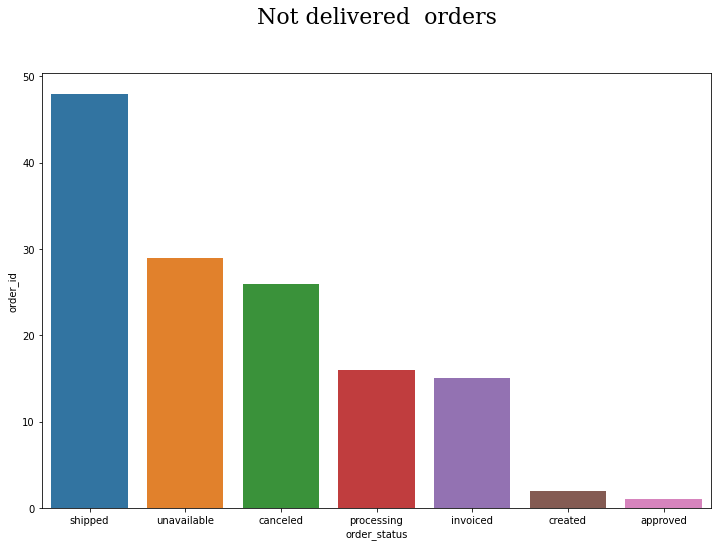

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(x='order_status', y='order_id', data=reasons)

plt.title(label = 'Not delivered  orders',
          color = 'black',
          fontsize = 22,
          x = 0.5,
          y = 1.1,
          family = 'serif')

plt.show()

<div class="alert alert-block alert-info"
<b>

Нетрудно заметить, что наибольшее количество заказов, которые не доставили находятся на этапе shipped(отгружен со склада)
Возможно необходимо оптимизировать передачу заказа партнеру по логистике, а может и вовсе сменить партнера.

</b>
</div

<div class="alert alert-block alert-danger"
<b>
<ol>
    
**Задача 3**

По каждому товару определить, в какой день недели товар чаще всего покупается.

</ol>
</b>
</div> 

<div class="alert alert-block alert-info"
<b>

Для начала объединим таблицы с информацией о заказах и о заказанных товарах.

</b>
</div

In [34]:
merge_orders_items = orders.merge(items)

<div class="alert alert-block alert-info"
<b>

Теперь применим условие о покупках

</b>
</div

In [35]:
orders_items = merge_orders_items.query('order_status == ["processing", "shipped", "delivered"]')

<div class="alert alert-block alert-info"
<b>

Переведем в даты время создания заказа

</b>
</div

In [36]:
orders_items['order_purchase_timestamp'] = pd.to_datetime(orders_items.order_purchase_timestamp)

<div class="alert alert-block alert-info"
<b>

Создадим новый столбец с названием дня недели

</b>
</div

In [37]:
orders_items['day_of_a_week'] = orders_items.order_purchase_timestamp.dt.day_name()

<div class="alert alert-block alert-info"
<b>

Ответим на вопрос задачи:

</b>
</div

In [38]:
orders_items.groupby(['product_id','day_of_a_week',],as_index=False)\
    .agg({'order_id':'count'}).sort_values(by='order_id',ascending=False).drop_duplicates(subset='product_id')

,product_id,day_of_a_week,order_id
15766,422879e10f46682990de24d770e7f83d,Wednesday,93
36178,99a4788cb24856965c36a24e339b6058,Monday,92
40679,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19944,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13422,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
23811,6435be64ad92f52631170f9a92718a99,Sunday,1
23813,64367bed3ed96fd9381676fbe33b6443,Sunday,1
23814,643a4049ae3e6df63858575f28cd7b21,Friday,1
23816,643a66b1dc5dad3de6cb5a41549e72f1,Sunday,1


<div class="alert alert-block alert-danger"
<b>
<ol>
    
**Задача 4**

Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
    
Не стоит забывать, что внутри месяца может быть не целое количество недель. 
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 
    
</ol>
</b>
</div>

<div class="alert alert-block alert-info"
<b>

Объединим все три таблицы 

</b>
</div

In [39]:
merge_orders_items_customers = merge_orders_items.merge(customers)

<div class="alert alert-block alert-info"
<b>

Необходимо найти покупки в месяц, поэтому поработаем с order_purchase_timestamp и приведем данные столбца к месяцу

</b>
</div

In [40]:
merge_orders_items_customers['order_purchase_timestamp'] = pd.to_datetime(merge_orders_items_customers.order_purchase_timestamp) 

In [41]:
merge_orders_items_customers['order_purchase_timestamp'] = merge_orders_items_customers.order_purchase_timestamp.dt.strftime('%Y-%m')

<div class="alert alert-block alert-info"
<b>

Сделаем новый фрейм, где посчитаем число покупок в месяц по каждому пользователю

</b>
</div

In [42]:
result_table = merge_orders_items_customers.query('order_status == ["processing", "shipped", "delivered"]')\
    .groupby(['customer_unique_id','order_purchase_timestamp'],as_index=False).agg({'order_status':'count'})

<div class="alert alert-block alert-info"
<b>

Сделаем новый столбец с числом дней в каждом месяце

</b>
</div

In [43]:
result_table['days'] = pd.to_datetime(result_table.order_purchase_timestamp) 

In [44]:
result_table.days = result_table.days.dt.days_in_month

<div class="alert alert-block alert-info"
<b>

Посчитаем, сколько недель в каждом месяце по полученным дням 

</b>
</div

In [45]:
result_table['weeks'] = result_table.days / 7

<div class="alert alert-block alert-info"
<b>

Теперь найдем, сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)

</b>
</div

In [46]:
result_table['metric'] = result_table.order_status/result_table.weeks

In [47]:
result_table.head()

,customer_unique_id,order_purchase_timestamp,order_status,days,weeks,metric
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,31,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,31,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,31,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,31,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,30,4.285714,0.233333


<div class="alert alert-block alert-danger"
<b>
<ol>
    
**Задача 5**

Используя pandas, проведи когортный анализ пользователей. 
    
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

    
</ol>
</b>
</div>

<div class="alert alert-block alert-info"
<b>

Возьмем снова общую таблицу с пользователями и заказами и поработаем с ней

</b>
</div

In [48]:
for_kogort = customers.merge(orders)

<div class="alert alert-block alert-info"
<b>

По условию задачи нам нужно работать с **retention**. 

**Возвратность (Retention)** — характеристика группы пользователей, вычисляемая соотношением активных пользователей в определённые
временные промежутки. Пример: некоторое приложение установили 50 человек, через неделю активными пользователями остались лишь
5 человек; возвратность: 5 / 50 * 100% = 10%.

</b>
</div

<div class="alert alert-block alert-info"
<b>

Для начала уберем пустые значения, о которых помним еще с предварительного анализа данных

</b>
</div

In [49]:
for_kogort.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [50]:
for_kogort_new = for_kogort.dropna(axis='index', how='any', subset=['order_approved_at'])

In [51]:
#хорошо, все сработало
for_kogort_new.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64

<div class="alert alert-block alert-info"
<b>

Необходима дата первой покупки.

Для этого создадим новый столбец, где для каждого покупателя отберем минимальную(самую раннюю) дату подтверждения заказа.

</b>
</div

In [52]:
for_kogort_new['first_purchase'] = for_kogort_new.groupby('customer_unique_id')['order_approved_at'].transform('min')

<div class="alert alert-block alert-info"
<b>

Приведем даты к месяцам

</b>
</div

In [53]:
for_kogort_new.order_purchase_timestamp = for_kogort_new.order_purchase_timestamp.dt.strftime('%Y-%m')
for_kogort_new.order_approved_at = for_kogort_new.order_approved_at.dt.strftime('%Y-%m')
for_kogort_new.first_purchase = for_kogort_new['first_purchase'].dt.strftime('%Y-%m')

In [54]:
for_kogort_new.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05,2017-05,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01,2018-01,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05,2018-05,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03,2018-03,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07,2018-07,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07


<div class="alert alert-block alert-info"
<b>

Найдем число уникальных покупателей в период с января по декабрь.

Для чего отберем только те строки, где статус заказа говорит о покупке,
вырем строки, где первая покупка была сделана в промежуток с января по декабрь,
сгруппируем по датам покупки и посчитаем число уникальных покупателей.

</b>
</div

In [55]:
for_kogort_table = for_kogort_new.query('order_status == ["processing", "shipped", "delivered"]')\
    .query("'2017-01' <= first_purchase <= '2017-12'")\
    .groupby(['first_purchase', 'order_approved_at'],as_index=False).agg({'customer_unique_id': 'nunique'})

<div class="alert alert-block alert-info"
<b>

Приведем к номеру месяца

</b>
</div

In [56]:
for_kogort_table.first_purchase = pd.to_datetime(for_kogort_table.first_purchase).dt.to_period("m")
for_kogort_table.order_approved_at = pd.to_datetime(for_kogort_table.order_approved_at).dt.to_period("m")

<div class="alert alert-block alert-info"
<b>

Посчитаем число месяцев с первой покупки до последующего подтвержения заказа

</b>
</div

In [57]:
for_kogort_table['diff'] = (for_kogort_table.order_approved_at - for_kogort_table.first_purchase).apply(attrgetter("n"))

In [58]:
for_kogort_table_finish = for_kogort_table.pivot(index='first_purchase', columns = 'diff', values = 'customer_unique_id')

In [59]:
retention = for_kogort_table_finish.div(for_kogort_table_finish.iloc[:,0], axis = 0)
final_table = (retention
            .style
            .set_caption('Retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту

final_table

diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_purchase,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.57%,0.28%,0.14%,0.43%,0.14%,0.43%,0.14%,0.14%,,0.28%,0.28%,0.71%,0.43%,0.14%,0.14%,0.28%,0.43%,0.14%
2017-02,100.00%,0.24%,0.24%,0.18%,0.42%,0.12%,0.24%,0.18%,0.12%,0.24%,0.12%,0.30%,0.18%,0.18%,0.12%,0.06%,0.06%,0.24%,
2017-03,100.00%,0.50%,0.35%,0.35%,0.35%,0.16%,0.16%,0.31%,0.31%,0.12%,0.35%,0.12%,0.23%,0.12%,0.16%,0.23%,0.08%,0.16%,
2017-04,100.00%,0.61%,0.22%,0.17%,0.31%,0.26%,0.35%,0.26%,0.35%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.22%,,
2017-05,100.00%,0.54%,0.51%,0.40%,0.31%,0.34%,0.43%,0.17%,0.26%,0.26%,0.28%,0.34%,0.20%,0.06%,0.20%,0.26%,,,
2017-06,100.00%,0.48%,0.35%,0.39%,0.26%,0.32%,0.39%,0.23%,0.13%,0.23%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,
2017-07,100.00%,0.53%,0.35%,0.21%,0.35%,0.19%,0.32%,0.11%,0.19%,0.24%,0.24%,0.29%,0.13%,0.27%,,,,,
2017-08,100.00%,0.68%,0.36%,0.27%,0.39%,0.53%,0.27%,0.27%,0.12%,0.17%,0.24%,0.17%,0.12%,,,,,,
2017-09,100.00%,0.66%,0.49%,0.34%,0.42%,0.27%,0.22%,0.22%,0.32%,0.17%,0.27%,0.07%,,,,,,,


<div class="alert alert-block alert-info"
<b>

В период с января по декабрь необходимо было найти когорту с самым высоким retention на 3й месяц.

Ответим на вопрос задачи:

</b>
</div

In [60]:
retention[2].idxmax()

Period('2017-05', 'M')

<div class="alert alert-block alert-danger"
<b>
<ol>
    
**Задача 6**
    
Часто для качественного анализа аудитории использую подходы, основанные на сегментации.
    
Используя python,построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.
В кластеризации можешь выбрать следующие метрики: 
* R - время от последней покупки пользователя до текущей даты, 
* F - суммарное количество покупок у пользователя за всё время, 
* M - сумма покупок за всё время. 
    
Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.
 
    
</ol>
</b>
</div>

<div class="alert alert-block alert-info"
<b>

Для начала объединим все три таблицы в одну и сбросим пустые значения

</b>
</div

In [61]:
full_table = merge_orders_items.merge(customers).dropna()  

<div class="alert alert-block alert-info"
<b>

В качестве текущей примем дату самой последней в столбце order_approved_at, увеличенную на 1 день,
будто анализируем на следующий день после сбора данных

</b>
</div

In [62]:
yesterday = full_table.order_approved_at.max()

In [63]:
today = yesterday + timedelta(days=1)


<div class="alert alert-block alert-info"
<b>

Теперь подготовим данные для RFM

</b>
</div


In [64]:
for_rfm = full_table.groupby('customer_unique_id',as_index=False)\
                    .agg({'order_approved_at': lambda x: (today - x.max()).days,\
                          'product_id': lambda x: len(x),\
                          'price': lambda x: x.sum()})\
                    .rename(columns={'order_approved_at': 'R', 'product_id': 'F', 'price': 'M'})


<div class="alert alert-block alert-info"
<b>

Когда имеются значения для RFM, нужно выделить диапазоны

Каждый квантиль будет содержать 20%

Разбиваем на диапазон: до 20%, 20-40%, 40-60%, 60-80% и выше 80 %

</b>
</div

In [65]:
for_rfm.head()

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [66]:
quantiles = for_rfm.quantile(q=[.2, .4, .6, .8])
quantiles

,R,F,M
0.2,92.0,1.0,39.9
0.4,177.0,1.0,69.9
0.6,268.0,1.0,109.9
0.8,382.0,1.0,179.9


<div class="alert alert-block alert-info"
<b>

Выделим сегменты покупателей

</b>
</div

In [67]:
def RClass(value,parameter,quantiles_table):
    if value <= quantiles_table[parameter][0.20]:
        return 1
    elif value <= quantiles_table[parameter][0.40]:
        return 2
    elif value <= quantiles_table[parameter][0.60]:
        return 3
    elif value <= quantiles_table[parameter][0.80]:
        return 4
    else:
        return 5
    
    
def FMClass(value,parameter,quantiles_table):
    if value <= quantiles[parameter][0.20]:
        return 5
    elif value <= quantiles[parameter][0.40]:
        return 4
    elif value <= quantiles[parameter][0.60]:
        return 3
    elif value <= quantiles_table[parameter][0.80]:
        return 2
    else:
        return 1   

<div class="alert alert-block alert-info"
<b>

Применяем функцию для каждого кластера

</b>
</div

In [68]:
for_rfm['R_range'] = for_rfm['R'].apply(RClass, args=('R',quantiles))

for_rfm['F_range'] = for_rfm['F'].apply(FMClass, args=('F',quantiles))

for_rfm['M_range'] = for_rfm['M'].apply(FMClass, args=('M',quantiles))

for_rfm['RFM_r'] = for_rfm.R_range.map(str) + for_rfm.F_range.map(str) + for_rfm.M_range.map(str)

In [69]:
for_rfm

,customer_unique_id,R,F,M,R_range,F_range,M_range,RFM_r
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,2,5,2,252
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,5,5,255
2,0000f46a3911fa3c0805444483337064,537,1,69.00,5,5,4,554
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,4,5,5,455
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,4,5,1,451
...,...,...,...,...,...,...,...,...
93337,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,5,1,1,511
93338,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,3,5,4,354
93339,ffff371b4d645b6ecea244b27531430a,568,1,89.90,5,5,3,553
93340,ffff5962728ec6157033ef9805bacc48,119,1,115.00,2,5,2,252


<div class="alert alert-block alert-info"
<b>

Таким образом, выделили сегменты, где 111 - сегмент покупателей, у которых **наименьшее** время с последней покупки, **наибольшее** число заказов и сумма покупок, а 555 - сегмент покупателей, у которых **наибольшее** время с последней покупки, **наименьшее** число заказов и сумма покупок.

</b>
</div